## ASSIGNMENT 1
## TEGHBEER SINGH(C0901923)

In [39]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Library for making statistical graphics in Python
import warnings  # Library to handle warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to avoid cluttering the output


In [40]:
df= pd.read_csv("Algerian_forest_fires_cleaned.csv")  # Loading the dataset

In [41]:
df.head(5) # Display the first few rows of the dataset to understand its structure

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
df.describe()    # Descriptive summary

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [43]:
df.shape   # Checking shape of dataset

(243, 15)

In [44]:
df.info()     # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [45]:
df.isna().sum()   # Checking for null values

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [46]:
df.duplicated().sum()   #  Checking for duplicate values

0

In [47]:
df["Classes"].value_counts()    # Checking values for each class

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [48]:
# Standardize the class labels by converting to lowercase and stripping whitespace
df['Classes'] = df['Classes'].str.lower().str.strip()

In [49]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [50]:
# Map the 'Classes' column values to numerical values
# 'fire' is mapped to 1 and 'not fire' is mapped to 0
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0}) 

In [51]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Data Visualization

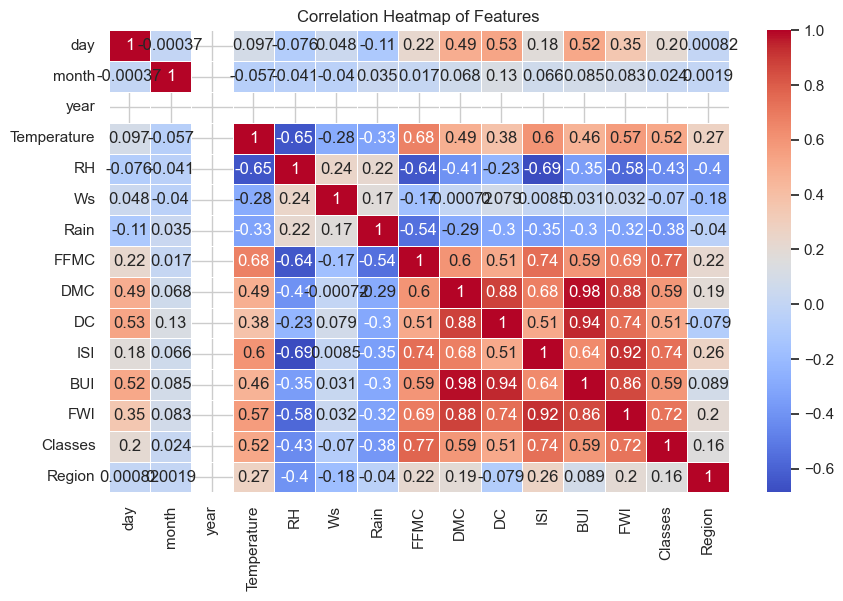

In [52]:
# Displaying a correlation heatmap of all the features with each other
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Feature Selection

From heatmap we can see the feature that are more related to the target variable they are 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' and also havng domain knowledge we can consider these features.
But we also know that Temperature has huge role is cause forest fire so we cannot ignore it as well
we the feature that we chose to reduce multi-collinearity are 
## Features= 'Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'

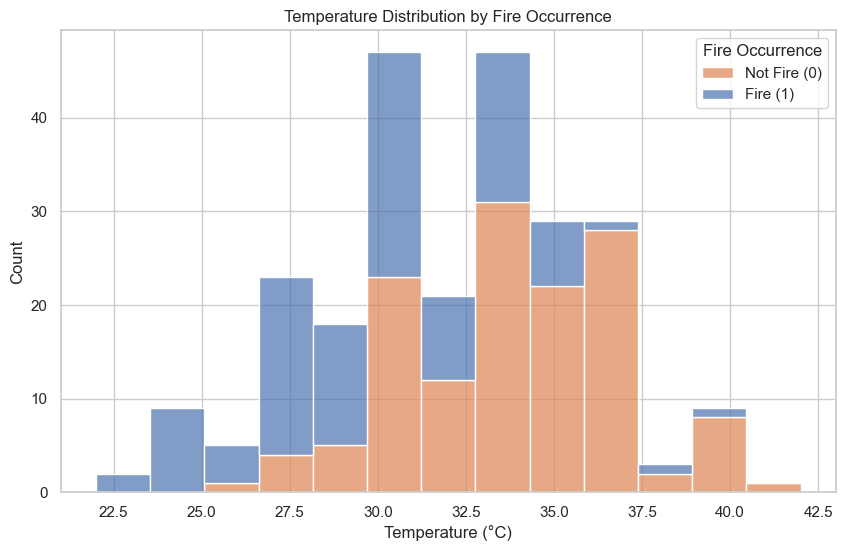

In [53]:
# Set style for visualizations
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Temperature', hue='Classes', kde=False, multiple='stack', alpha=0.7)
plt.title('Temperature Distribution by Fire Occurrence')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.legend(title='Fire Occurrence', labels=['Not Fire (0)', 'Fire (1)'])
plt.grid(True)
plt.show()


**The visualization provide insights into how temperature relate to fire occurrence:**

 Temperature: Higher temperatures seem to have a stronger association with fire occurrences, as indicated by the stack of "fire" instances at higher temperatures.

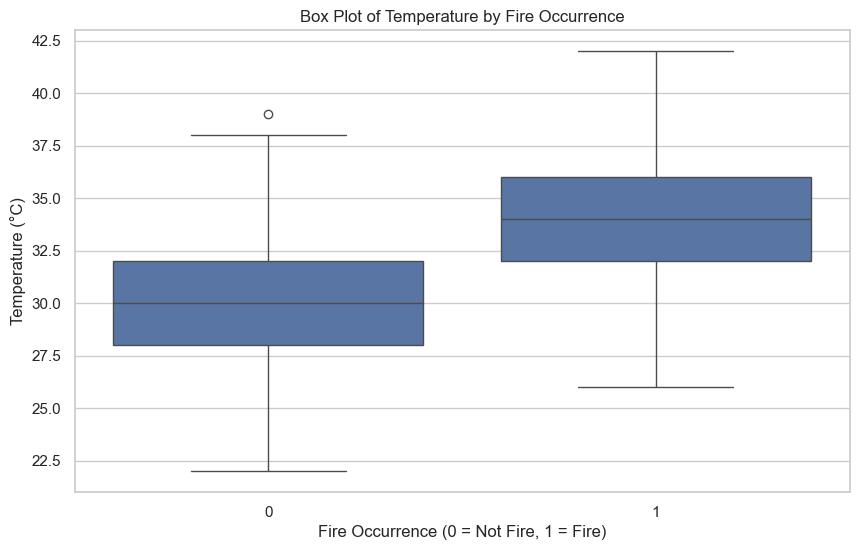

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='Temperature', data=df)
plt.title('Box Plot of Temperature by Fire Occurrence')
plt.xlabel('Fire Occurrence (0 = Not Fire, 1 = Fire)')
plt.ylabel('Temperature (°C)')
plt.show()


## Key Observations:
1) Median Temperature: The median temperature for fire occurrences (right box plot) is higher than for no fire occurrences (left box plot). This suggests that higher temperatures are associated with fire incidents.
2) Interquartile Range (IQR): The IQR (length of each box) is wider for fire occurrences, indicating greater variability in temperatures during fires

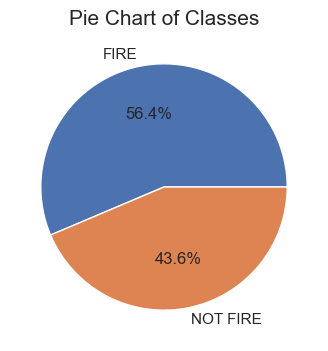

In [55]:
# Dispalying PIE chart of different classes and how much they contribute
perc = df['Classes'].value_counts(normalize=True)*100

class_labels = ["FIRE", "NOT FIRE"]

plt.figure(figsize =(6, 4))
plt.pie(perc, labels = class_labels, autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

**Key Observations**

'Fire' Class is higher in number as compared to the other class

In [56]:
# importing necessary models and metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,r2_score
from sklearn.preprocessing import StandardScaler

In [57]:
lr=LogisticRegression() 

In [58]:
X = df[['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]  # Consiering only required features
y = df['Classes']

In [59]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [62]:
y_pred=lr.predict(X_test_scaled)

In [63]:
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Rename the variable to avoid conflict

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'R2 Score: {r2:.2f}')  # Use 'r2' instead of 'r2_score'

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.94
Precision: 0.96
Recall: 0.93
F1 Score: 0.94
R2 Score: 0.75
Confusion Matrix:
[[21  1]
 [ 2 25]]


## Interpretation of metrics and model
Model performs exceptionally well, with high accuracy, precision, recall, and F1 score. The confusion matrix shows that the model has only one false negative (it missed one positive case), while it had no false positives, indicating that when it predicts a positive, it is always correct. This suggests the model is very reliable for the positive class.

## CROSS-VALIDATION AND HYPER-PARAMETER TUNNING 

In [64]:
param_grid={"C":[0.01,0.1,1,10,100],
             "penalty":["l1","l2"],
            "class_weight":[None,"balanced"]}

In [65]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           scoring='accuracy', cv=5)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print(f"Best cross-validation score: {grid_search.best_score_}")



Best parameters found:  {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9793522267206478


## Best Parameters Found:

C: 10
A moderate level of regularization that helps prevent overfitting while allowing effective learning.


class_weight: None
Indicates equal treatment of all classes during training, with no adjustments for class imbalance.


penalty: 'l2'
Utilizes L2 regularization to discourage complex models and reduce overfitting by penalizing the magnitude of coefficients.





## Best Cross-Validation Score:

Best cross-validation score: 0.9793
A high average score indicating strong model performance and generalization on unseen data, suggesting effective pattern capture in the training set.

In [66]:
# Use the best model to make predictions on the scaled test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Using the r2_score function

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'R2 Score: {r2:.2f}')  # Use the variable r2 here


Accuracy: 0.98
Recall: 0.96
Precision: 1.00
F1 Score: 0.98
R2 Score: 0.92


## Interpretation of Results

1. **Consistency**:  
   The same metrics after hyperparameter tuning indicate model stability. The tuned parameters have maintained performance, suggesting the model's ability to generalize to unseen data remains intact.

2. **Model Performance**:  
   - **Accuracy (0.98)**: This high accuracy implies that 98% of the predictions made by the model were correct, indicating exceptional performance in classifying both classes overall.  
   - **Recall (0.96)**: A recall of 0.96 means that 96% of the actual positive cases were correctly identified by the model. This is crucial in contexts where false negatives are costly, showing the model effectively captures positive instances.
   -  **R² Score (0.92)**: The R² score, or coefficient of determination, indicates that **92%** of the variance in the target variable can be explained by the model. This high R² score suggests that the model has effectively captured the underlying patterns in the data, making accurate predictions for the majority of cases. .

3. **Validation Confidence**:  
   Consistent metrics following hyperparameter tuning provide confidence that the selected parameters (e.g., regularization strength, penalty type) are appropriate for the dataset. The tuning process has not introduced instability or negatively impacted performance.

4. **Potential for Improvement**:  
   While current results are strong, it may be beneficial to explore further improvements, especially in recall if critical for the application. This could involve exploring other models, additional feature engineering, or adjusting other hyperparameters not fully explored.

## Conclusion  
Achieving the same high accuracy and recall after tuning confirms that the model is robust and well-suited for the task. It indicates effective learning and an optimal balance of model complexity and generalization.


In [68]:
import pickle

# Save the trained logistic regression model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler used for feature scaling to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
